In [ ]:
# Import the packages for this lab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import linear regression models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

# Import logistic regression models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Import imputer
from sklearn.impute import SimpleImputer as Imputer  # Specific function from common machine learning package

# Import confusion matrix function from sklearn
from sklearn.metrics import confusion_matrix


# Import portion of a package
import matplotlib.pyplot as plt  # Most common visualization package that a lot of others are based on

# Import portion of a package
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_freq = "/content/drive/MyDrive/MIE368 Group Project/Data/FINAL state_freq_data_dates_adjusted.csv"
path_costs = "/content/drive/MyDrive/MIE368 Group Project/Data/state-cost-data1.csv"
path_region = "/content/drive/MyDrive/MIE368 Group Project/Data/region_freq_data_dates_adjusted.csv"

In [ ]:
df_r =  pd.read_csv(path_region)
df_r.head()

,year,state,west,midwest,northeast,southeast,southwest,drought,flooding,freeze,...,Min_Tmp,Max_Tmp,Precip,Avg_Elevation,Unemployment,Population,Size,GDP,Inflation_Rate,Personal Income
0,1980,AK,1.0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,1900.0,9.533333,401851.0,663267.0,15282.0,0.1355,6069.0
1,1980,AL,0.0,0.0,0.0,1.0,0.0,1,0,0,...,49.6,74.2,54.31,500.0,8.816667,3893888.0,52419.0,36142.0,0.1355,30521.0
2,1980,AR,0.0,0.0,0.0,1.0,0.0,1,1,0,...,48.2,72.3,38.33,1900.0,7.533333,2286435.0,53179.0,20276.0,0.1355,17213.0
3,1980,AZ,0.0,0.0,0.0,0.0,1.0,0,0,0,...,45.9,74.9,11.55,500.0,6.608333,2718215.0,113998.0,30764.0,0.1355,25964.0
4,1980,CA,1.0,0.0,0.0,0.0,0.0,0,0,0,...,45.6,70.7,21.88,650.0,6.900000,23667902.0,163695.0,327958.0,0.1355,28390.0


In [ ]:
df_raw =  pd.read_csv(path_freq)
df_raw = df_raw.drop(columns = "helper")
df_raw.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Cost,...,Min_Tmp,Max_Tmp,Precip,Avg_Elevation,Unemployment,Population,Size,GDP,Inflation_Rate,Personal Income
0,1980,AK,0,0,0,0,0,0,0,0.0,...,NaN,NaN,NaN,1900.0,9.533333,401851.0,663267.0,15282.0,0.1355,6069.0
1,1980,AL,1,0,0,0,0,0,0,2000.0,...,49.6,74.2,54.31,500.0,8.816667,3893888.0,52419.0,36142.0,0.1355,30521.0
2,1980,AR,1,1,0,0,0,0,0,1000.0,...,48.2,72.3,38.33,1900.0,7.533333,2286435.0,53179.0,20276.0,0.1355,17213.0
3,1980,AZ,0,0,0,0,0,0,0,0.0,...,45.9,74.9,11.55,500.0,6.608333,2718215.0,113998.0,30764.0,0.1355,25964.0
4,1980,CA,0,0,0,0,0,0,0,0.0,...,45.6,70.7,21.88,650.0,6.900000,23667902.0,163695.0,327958.0,0.1355,28390.0


In [ ]:
df_region= df_r.dropna()
df_region = df_r.reset_index()
df_region.head()
df_region = df_region.drop(columns = 'index')
df_region['sum_incidents'] = df_region['drought'] + df_region['flooding'] + df_region['freeze'] + df_region['severe storm'] + df_region['tropical cyclone'] + df_region['wildfire'] + df_region['winter storm']
df_region.head()

,year,state,west,midwest,northeast,southeast,southwest,drought,flooding,freeze,...,Max_Tmp,Precip,Avg_Elevation,Unemployment,Population,Size,GDP,Inflation_Rate,Personal Income,sum_incidents
0,1980,AK,1.0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,1900.0,9.533333,401851.0,663267.0,15282.0,0.1355,6069.0,0
1,1980,AL,0.0,0.0,0.0,1.0,0.0,1,0,0,...,74.2,54.31,500.0,8.816667,3893888.0,52419.0,36142.0,0.1355,30521.0,1
2,1980,AR,0.0,0.0,0.0,1.0,0.0,1,1,0,...,72.3,38.33,1900.0,7.533333,2286435.0,53179.0,20276.0,0.1355,17213.0,2
3,1980,AZ,0.0,0.0,0.0,0.0,1.0,0,0,0,...,74.9,11.55,500.0,6.608333,2718215.0,113998.0,30764.0,0.1355,25964.0,0
4,1980,CA,1.0,0.0,0.0,0.0,0.0,0,0,0,...,70.7,21.88,650.0,6.900000,23667902.0,163695.0,327958.0,0.1355,28390.0,0


In [ ]:
df_region.dropna(inplace=True)

In [ ]:
df = df_raw.dropna()
df = df.reset_index()
df = df.drop(columns = 'index')
df['sum_incidents'] = df['drought'] + df['flooding'] + df['freeze'] + df['severe storm'] + df['tropical cyclone'] + df['wildfire'] + df['winter storm']
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Cost,...,Max_Tmp,Precip,Avg_Elevation,Unemployment,Population,Size,GDP,Inflation_Rate,Personal Income,sum_incidents
0,1980,AL,1,0,0,0,0,0,0,2000.0,...,74.2,54.31,500.0,8.816667,3893888.0,52419.0,36142.0,0.1355,30521.0,1
1,1980,AR,1,1,0,0,0,0,0,1000.0,...,72.3,38.33,1900.0,7.533333,2286435.0,53179.0,20276.0,0.1355,17213.0,2
2,1980,AZ,0,0,0,0,0,0,0,0.0,...,74.9,11.55,500.0,6.608333,2718215.0,113998.0,30764.0,0.1355,25964.0,0
3,1980,CA,0,0,0,0,0,0,0,0.0,...,70.7,21.88,650.0,6.900000,23667902.0,163695.0,327958.0,0.1355,28390.0,0
4,1980,CO,0,0,0,0,0,0,0,0.0,...,60.3,15.85,4100.0,5.883333,2889964.0,104093.0,38332.0,0.1355,31164.0,0


In [ ]:
# Percentage of rows that have more than 1 entry across all disaster columns
df2 = df.copy()
disasters = df.columns[2:9]
for disaster in disasters:
  # multiplying by 1 turns true to 1 and false to 0.
  df2[disaster] = 1*(df2[disaster]>=1)
df_tmp = df2[disasters].sum(axis=1)
print(sum((df_tmp > 1)) / df_tmp.shape[0])

0.2823325635103926


In [ ]:
df2.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Cost,...,Max_Tmp,Precip,Avg_Elevation,Unemployment,Population,Size,GDP,Inflation_Rate,Personal Income,sum_incidents
0,1980,AL,1,0,0,0,0,0,0,2000.0,...,74.2,54.31,500.0,8.816667,3893888.0,52419.0,36142.0,0.1355,30521.0,1
1,1980,AR,1,1,0,0,0,0,0,1000.0,...,72.3,38.33,1900.0,7.533333,2286435.0,53179.0,20276.0,0.1355,17213.0,2
2,1980,AZ,0,0,0,0,0,0,0,0.0,...,74.9,11.55,500.0,6.608333,2718215.0,113998.0,30764.0,0.1355,25964.0,0
3,1980,CA,0,0,0,0,0,0,0,0.0,...,70.7,21.88,650.0,6.900000,23667902.0,163695.0,327958.0,0.1355,28390.0,0
4,1980,CO,0,0,0,0,0,0,0,0.0,...,60.3,15.85,4100.0,5.883333,2889964.0,104093.0,38332.0,0.1355,31164.0,0


In [ ]:
df2.iloc[8]

year                     1980
state                      IA
drought                     1
flooding                    0
freeze                      0
severe storm                0
tropical cyclone            0
wildfire                    0
winter storm                0
Cost                   2000.0
Avg_Tmp                  48.2
Min_Tmp                  37.0
Max_Tmp                  59.4
Precip                  27.89
Avg_Elevation           600.0
Unemployment         5.933333
Population          2913808.0
Size                  56271.0
GDP                   34582.0
Inflation_Rate         0.1355
Personal Income       27894.0
sum_incidents               1
Name: 8, dtype: object

# EDA

##Correlation

                   drought  flooding    freeze  severe storm  \
drought           1.000000 -0.043944  0.044886      0.069169   
flooding         -0.043944  1.000000  0.075079      0.245449   
freeze            0.044886  0.075079  1.000000     -0.032325   
severe storm      0.069169  0.245449 -0.032325      1.000000   
tropical cyclone  0.010165 -0.001646  0.001151      0.234182   
wildfire          0.256746 -0.042636 -0.021641     -0.028822   
winter storm     -0.086169 -0.039681 -0.070104      0.019751   
Cost              0.070361  0.125183  0.000650      0.183742   
Avg_Tmp           0.178672  0.086165  0.056284      0.262450   
Min_Tmp           0.130576  0.100403  0.061729      0.286682   
Max_Tmp           0.219255  0.069976  0.049369      0.230837   
Precip           -0.167020  0.110924  0.045467      0.234213   
Avg_Elevation    -0.013648  0.012451  0.013805      0.072445   
Unemployment      0.009021 -0.003975  0.122504      0.034290   
Population        0.066083  0.066071  0.

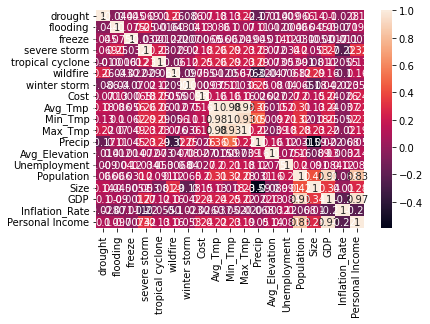

In [ ]:
# Prediction correlation
#Calculate correlation coefficents
corr_df = df.drop(['year','state','sum_incidents'],axis=1).corr()
print(corr_df)  # Print correlation coefficents to notebook

# Plot correlation coefficents in heat map
sns.heatmap(corr_df,annot=True)
plt.show()

In [ ]:
# Multicolinearity check to remove most correlated features

# Define a function
def print_heavily_correlated_features(df, threshold=0.7):
  """
  For each feature in "df", this function counts the number of features that 
  have a correlation coefficient with that is higher than "threshold".

  Parameters
  ----------
    df: pandas DataFrame type 
        Contains the features for several data points
    threshold: float type 
        he threshold for which "heavily correlated" is defined.
  """

  corr = df.corr().abs()  # calculate the correlation matrix
  corr = corr[corr > threshold]  # a mask of features that are heavily correlated

  # Print out the "heavily correlated" counts
  print(corr.count().sort_values(ascending=False) - 1)  

# Execute the function
print_heavily_correlated_features(df.drop(['year','state','sum_incidents'],axis=1))


Min_Tmp             2
Avg_Tmp             2
GDP                 2
Population          2
Max_Tmp             2
Personal Income     2
winter storm        0
Cost                0
wildfire            0
flooding            0
tropical cyclone    0
Precip              0
Avg_Elevation       0
Unemployment        0
severe storm        0
Size                0
freeze              0
Inflation_Rate      0
drought             0
dtype: int64


In [ ]:
# make a df with the sum of all diaster frequencies.
# Helps determine cost per diaster for every state and also which natural diaster is most frequency in each state.
df_dis_freq = df.groupby('state').sum().iloc[:,1:8]
df_dis_freq.head()

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
state,,,,,,,
AL,15,2,3,42,21,2,8
AR,14,9,2,40,4,0,6
AZ,12,1,0,1,0,12,0
CA,12,4,3,4,0,17,0
CO,13,2,1,28,0,11,0


In [ ]:
most_frequent_dis_per_state = pd.DataFrame(df_dis_freq.T.idxmax())
most_frequent_dis_per_state = most_frequent_dis_per_state.rename(columns={0:"Disasters"})
most_frequent_dis_per_state['Frequency'] = df_dis_freq.T.max()
most_frequent_dis_per_state.head()

,Disasters,Frequency
state,,
AL,severe storm,42
AR,severe storm,40
AZ,drought,12
CA,wildfire,17
CO,severe storm,28


In [ ]:
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Cost,...,Max_Tmp,Precip,Avg_Elevation,Unemployment,Population,Size,GDP,Inflation_Rate,Personal Income,sum_incidents
0,1980,AL,1,0,0,0,0,0,0,2000.0,...,74.2,54.31,500.0,8.816667,3893888.0,52419.0,36142.0,0.1355,30521.0,1
1,1980,AR,1,1,0,0,0,0,0,1000.0,...,72.3,38.33,1900.0,7.533333,2286435.0,53179.0,20276.0,0.1355,17213.0,2
2,1980,AZ,0,0,0,0,0,0,0,0.0,...,74.9,11.55,500.0,6.608333,2718215.0,113998.0,30764.0,0.1355,25964.0,0
3,1980,CA,0,0,0,0,0,0,0,0.0,...,70.7,21.88,650.0,6.900000,23667902.0,163695.0,327958.0,0.1355,28390.0,0
4,1980,CO,0,0,0,0,0,0,0,0.0,...,60.3,15.85,4100.0,5.883333,2889964.0,104093.0,38332.0,0.1355,31164.0,0


In [ ]:
# Convert categorical data into "dummy" variables
df_states = pd.get_dummies(df, columns=['state'])
df_states.head()

,year,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Cost,Avg_Tmp,...,state_PA,state_RI,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WI,state_WY
0,1980,1,0,0,0,0,0,0,2000.0,61.9,...,0,0,0,0,0,0,0,0,0,0
1,1980,1,1,0,0,0,0,0,1000.0,60.3,...,0,0,0,0,0,0,0,0,0,0
2,1980,0,0,0,0,0,0,0,0.0,60.4,...,0,0,0,0,0,0,0,0,0,0
3,1980,0,0,0,0,0,0,0,0.0,58.1,...,0,0,0,0,0,0,0,0,0,0
4,1980,0,0,0,0,0,0,0,0.0,46.2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Find the rows that have more than 1 entry across all disaster columns
df2 = df.copy()
disasters = df.columns[2:9]
for disaster in disasters:
  # multiplying by 1 turns true to 1 and false to 0.
  df2[disaster] = 1*(df2[disaster]>=1)

df_tmp = df2[disasters].sum(axis=1)
rows_keep = df_tmp[df_tmp <= 1]


In [ ]:
df_states = df_states.loc[rows_keep.index,:]

In [ ]:
df_states

,year,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Cost,Avg_Tmp,...,state_PA,state_RI,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WI,state_WY
0,1980,1,0,0,0,0,0,0,2000.0,61.9,...,0,0,0,0,0,0,0,0,0,0
2,1980,0,0,0,0,0,0,0,0.0,60.4,...,0,0,0,0,0,0,0,0,0,0
3,1980,0,0,0,0,0,0,0,0.0,58.1,...,0,0,0,0,0,0,0,0,0,0
4,1980,0,0,0,0,0,0,0,0.0,46.2,...,0,0,0,0,0,0,0,0,0,0
5,1980,0,0,0,0,0,0,0,0.0,47.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,2020,0,0,0,4,0,0,0,1000.0,52.7,...,0,0,0,0,0,0,0,0,0,0
1720,2020,0,0,0,6,0,0,0,2000.0,60.5,...,0,0,0,0,0,0,0,0,0,0
1724,2020,0,0,0,2,0,0,0,250.0,47.3,...,0,0,1,0,0,0,0,0,0,0
1729,2020,0,0,0,0,0,0,0,0.0,44.6,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_states.columns

Index(['year', 'drought', 'flooding', 'freeze', 'severe storm',
       'tropical cyclone', 'wildfire', 'winter storm', 'Cost', 'Avg_Tmp',
       'Min_Tmp', 'Max_Tmp', 'Precip', 'Avg_Elevation', 'Unemployment',
       'Population', 'Size', 'GDP', 'Inflation_Rate', 'Personal Income',
       'sum_incidents', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DE', 'state_GA', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WI', 'state_WY'],
      dtype='object')

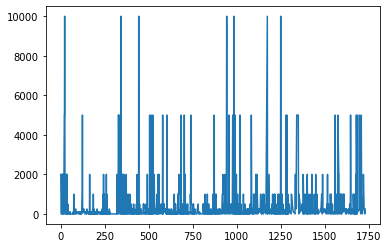

In [ ]:
df_test.Cost.plot()

# Predict

## Fit linreg

In [ ]:
df_test = df_states.drop(labels=1042, axis=0)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
df_train = df_test[df_test.year<2018]
df_test = df_test[df_test.year>=2018]

In [ ]:
df_train = df_test[df_test.year<2009]
df_test = df_test[df_test.year>=2009]

In [ ]:
# Split the data into training and testing sets

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df_states.drop(columns=['year','Cost']),
#                                                     df_states.Cost,
#                                                     test_size = 0.3,
#                                                     random_state = 1)

# Define features to remove from the feature data (i.e., X)
drop_for_X = ['year','Cost'] #,'Min_Tmp','Avg_Tmp','GDP','Population','Max_Tmp','Personal Income']

# Partition the training data into features and target
X_train = df_train.drop(columns=drop_for_X)
y_train = df_train.Cost

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=drop_for_X)
y_test = df_test.Cost

# Predict the number of wins
y_test_predictions = linreg.predict(X_test)

train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')
print(mean_absolute_error(y_test, y_test_predictions))
print(np.sqrt(mean_squared_error(y_test, y_test_predictions)))
print(mean_absolute_percentage_error(y_test, y_test_predictions))
print(np.mean(np.abs((y_test - y_test_predictions) / y_test_predictions)) * 100)

The train score is 0.359 and the test score is 0.092
649.6603669510621
1091.6702838606402
4.7882763760698496e+17
167.95735911763134


In [ ]:
# Fit the model
lasso = LassoCV()
lasso.fit(X_train, y_train)

y_test_predictions = lasso.predict(X_test)

# calculate the score
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
print(f'The train score is {train_score:.3} and the test score is {test_score:.3}')
print(mean_absolute_error(y_test, y_test_predictions))
print(np.sqrt(mean_squared_error(y_test, y_test_predictions)))
print(mean_absolute_percentage_error(y_test, y_test_predictions))

The train score is 0.0421 and the test score is 0.0107
548.6815276667468
1139.3193526776492
5.5858252959078195e+17


In [ ]:
# Fit the model
ridge = RidgeCV()
ridge.fit(X_train, y_train)

y_test_predictions = ridge.predict(X_test)
# calculate the score
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
print(f'The train score is {train_score:.3} and the test score is {test_score:.3}')
print(mean_absolute_error(y_test, y_test_predictions))
print(np.sqrt(mean_squared_error(y_test, y_test_predictions)))
print(mean_absolute_percentage_error(y_test, y_test_predictions))

The train score is -0.436 and the test score is -0.551
887.293336948394
1426.4836249626512
1.1342858937266025e+18


In [ ]:
def make_models():
  """Makes a dictionary of four untrained models"""
  
  return {
      'LR': LinearRegression(),
      'Ridge': RidgeCV(),
      'Lasso': LassoCV(),
  }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# cart_mdl = RandomForestRegressor(random_state=0)
cart_mdl = RandomForestRegressor(n_estimators= 200, min_samples_split = 10, min_samples_leaf = 2, max_features='sqrt',max_depth =50, bootstrap = True, random_state=0)

cart_mdl.fit(X_train, y_train)
cart_mdl_predictions = cart_mdl.predict(X_test)
# cart_mdl.score(X,y)

train_score = cart_mdl.score(X_train, y_train)
test_score = cart_mdl.score(X_test, y_test)

print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')
print(mean_absolute_error(y_test, cart_mdl_predictions))
print(np.sqrt(mean_squared_error(y_test, cart_mdl_predictions)))
print(mean_absolute_percentage_error(y_test, cart_mdl_predictions))

#mean_absolute_percentage_error
print(np.mean(np.abs((y_test - cart_mdl_predictions) / cart_mdl_predictions)) * 100)

The train score is 0.559 and the test score is 0.164
526.4538283998464
1047.2558582554864
1.9306293382565395e+17
94.36273742354334


In [ ]:
cart_mdl_predictions.max()

3072.2235305449167

In [ ]:
cart_mdl_predictions

array([2125.5 ,    0.  , 4032.5 , 3358.5 ,  430.5 ,    0.  ,    0.  ,
        536.  ,  597.5 ,  196.5 ,    0.  ,  731.5 , 2606.55,    0.  ,
       2271.6 ,    0.  ,  258.5 ,    0.  ,    0.  ,  476.5 ,    0.  ,
        555.  ,    0.  ,  738.1 ,    0.  ,    0.  ,  950.05,  373.65,
        388.  , 1794.  , 2198.  ,  739.5 ,    0.  , 1337.5 , 2086.5 ,
       1556.  ,  384.55,  835.  ,    0.  ,  895.5 , 1642.  ,  442.  ,
          0.  ,  964.5 ])

In [ ]:
# Calculate the absolute errors
errors = abs(cart_mdl_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 683.23 degrees.
Accuracy: -37.4 %.


In [ ]:
#70/30 split == 2009 

from sklearn.ensemble import RandomForestRegressor

cart_mdl = RandomForestRegressor(random_state=0)
# cart_mdl = RandomForestRegressor(n_estimators= 200, min_samples_split = 10, min_samples_leaf = 2, max_features='sqrt',max_depth =50, bootstrap = True, random_state=0)

cart_mdl.fit(X_train, y_train)
cart_mdl_predictions = cart_mdl.predict(X_test)
# cart_mdl.score(X,y)

train_score = cart_mdl.score(X_train, y_train)
test_score = cart_mdl.score(X_test, y_test)

print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')
print(mean_absolute_error(y_test, cart_mdl_predictions))
print(np.sqrt(mean_squared_error(y_test, cart_mdl_predictions)))
print(mean_absolute_percentage_error(y_test, cart_mdl_predictions))

#mean_absolute_percentage_error
print(np.mean(np.abs((y_test - cart_mdl_predictions) / cart_mdl_predictions)) * 100)

The train score is 0.901 and the test score is 0.008
528.429865771812
1141.0929140697826
2.4180400683868436e+16
90.23787883936265


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True],
                                        'max_depth': [40,50,60],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2,3,4],
                                        'min_samples_split': [10,20,30],
                                        'n_estimators': [200]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [40, 50, 60],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [200]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

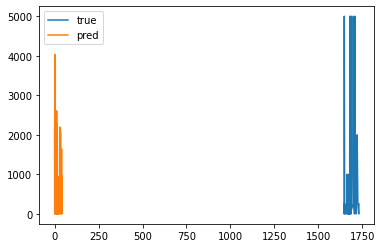

In [ ]:
from matplotlib import pyplot as plt

plt.plot(y_test)
plt.plot(cart_mdl_predictions)
plt.legend(["true", "pred"])
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train) #y_train)
X_train['cost_cate'] = kmeans.predict(X_test)

ValueError: ignored

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
technique_name = 'Scaling'

def standardize_data(X_train, X_out_of_sample):#,y_train,y_out_of_sample):
    """standardizes all of the data in X_train and X_out_of_sample. The mean and
    standard deviation of each feature (i.e., each column) from the X_train
    data is used to standardize both the X_train and X_out_of sample."""

    # Initialize data frame for scaled data
    X_train_standardized = X_train.copy()
    X_out_of_sample_standardized = X_out_of_sample.copy()
    # y_train_standardized = y_train.copy()#.values.reshape(1,-1)
    # y_out_of_sample_standardized = y_out_of_sample.copy()#.values.reshape(1,-1)

    # Define scaling function
    scaler = StandardScaler()
    
    '''Use scaler to standardize your data. You'll need to fit scaler with your
    training data (use the fit method) and standardize your training and 
    out-of-sample data (use the transform method)'''
    # -------------------------------------------------------------------------

    # Scale the X features      
    scaler.fit(X_train)
    X_train_standardized.loc[:]  = scaler.transform(X_train)
    X_out_of_sample_standardized.loc[:] = scaler.transform(X_out_of_sample)

    # #Scale target data
    # scaler.fit(y_train.values.reshape(-1,1)).reshape(-1)
    # y_train_standardized.loc[:]  = scaler.transform(y_train.values.reshape(-1,1)).reshape(-1)
    # y_out_of_sample_standardized.loc[:] = scaler.transform(y_out_of_sample.values.reshape(-1,1)).reshape(-1)
                        
    # -------------------------------------------------------------------------

    return X_train_standardized, X_out_of_sample_standardized,scaler #,y_train_standardized, y_out_of_sample_standardized, scaler

# Make new data that is scaled"
X_train_scaled, X_test_scaled, scaler = standardize_data(X_train, X_test)#,y_train,y_test)

train_score = cart_mdl.score(X_train_scaled, y_train)
test_score = cart_mdl.score(X_test_scaled, y_test)

print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')

The train score is -0.447 and the test score is -0.723


In [ ]:
from sklearn.preprocessing import MinMaxScaler
technique_name = 'Scaling'

def standardize_data(X_train, X_out_of_sample):#,y_train,y_out_of_sample):
    """standardizes all of the data in X_train and X_out_of_sample. The mean and
    standard deviation of each feature (i.e., each column) from the X_train
    data is used to standardize both the X_train and X_out_of sample."""

    # Initialize data frame for scaled data
    X_train_standardized = X_train.copy()
    X_out_of_sample_standardized = X_out_of_sample.copy()
    # y_train_standardized = y_train.copy()#.values.reshape(1,-1)
    # y_out_of_sample_standardized = y_out_of_sample.copy()#.values.reshape(1,-1)

    # Define scaling function
    scaler = MinMaxScaler()
    
    '''Use scaler to standardize your data. You'll need to fit scaler with your
    training data (use the fit method) and standardize your training and 
    out-of-sample data (use the transform method)'''
    # -------------------------------------------------------------------------

    # Scale the X features      
    scaler.fit(X_train)
    X_train_standardized.loc[:]  = scaler.transform(X_train)
    X_out_of_sample_standardized.loc[:] = scaler.transform(X_out_of_sample)

    # #Scale target data
    # scaler.fit(y_train.values.reshape(-1,1)).reshape(-1)
    # y_train_standardized.loc[:]  = scaler.transform(y_train.values.reshape(-1,1)).reshape(-1)
    # y_out_of_sample_standardized.loc[:] = scaler.transform(y_out_of_sample.values.reshape(-1,1)).reshape(-1)
                        
    # -------------------------------------------------------------------------

    return X_train_standardized, X_out_of_sample_standardized,scaler #,y_train_standardized, y_out_of_sample_standardized, scaler

# Make new data that is scaled"
X_train_scaled, X_test_scaled, scaler = standardize_data(X_train, X_test)#,y_train,y_test)

train_score = cart_mdl.score(X_train_scaled, y_train)
test_score = cart_mdl.score(X_test_scaled, y_test)

print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')

The train score is -0.170 and the test score is -0.134


In [ ]:
from sklearn.preprocessing import RobustScaler
technique_name = 'Scaling'

def standardize_data(X_train, X_out_of_sample):#,y_train,y_out_of_sample):
    """standardizes all of the data in X_train and X_out_of_sample. The mean and
    standard deviation of each feature (i.e., each column) from the X_train
    data is used to standardize both the X_train and X_out_of sample."""

    # Initialize data frame for scaled data
    X_train_standardized = X_train.copy()
    X_out_of_sample_standardized = X_out_of_sample.copy()
    # y_train_standardized = y_train.copy()#.values.reshape(1,-1)
    # y_out_of_sample_standardized = y_out_of_sample.copy()#.values.reshape(1,-1)

    # Define scaling function
    scaler = RobustScaler()
    
    '''Use scaler to standardize your data. You'll need to fit scaler with your
    training data (use the fit method) and standardize your training and 
    out-of-sample data (use the transform method)'''
    # -------------------------------------------------------------------------

    # Scale the X features      
    scaler.fit(X_train)
    X_train_standardized.loc[:]  = scaler.transform(X_train)
    X_out_of_sample_standardized.loc[:] = scaler.transform(X_out_of_sample)

    # #Scale target data
    # scaler.fit(y_train.values.reshape(-1,1)).reshape(-1)
    # y_train_standardized.loc[:]  = scaler.transform(y_train.values.reshape(-1,1)).reshape(-1)
    # y_out_of_sample_standardized.loc[:] = scaler.transform(y_out_of_sample.values.reshape(-1,1)).reshape(-1)
                        
    # -------------------------------------------------------------------------

    return X_train_standardized, X_out_of_sample_standardized,scaler #,y_train_standardized, y_out_of_sample_standardized, scaler

# Make new data that is scaled"
X_train_scaled, X_test_scaled, scaler = standardize_data(X_train, X_test)#,y_train,y_test)

train_score = cart_mdl.score(X_train_scaled, y_train)
test_score = cart_mdl.score(X_test_scaled, y_test)

print(f'The train score is {train_score:.3f} and the test score is {test_score:.3f}')

The train score is -0.466 and the test score is -0.641


## Fit logreg to every row of the dataframe

In [ ]:
from sklearn.metrics import precision_score, recall_score

scores = {}
# Split the data into training and testing sets
drop_for_X = ['year','sum_incidents','total_economic_loss','drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm','Min_Tmp','Max_Tmp']
disasters = ['drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']
X = df_states.drop(columns=drop_for_X)
for disaster in disasters:

  y = df_states.loc[:,disaster]

  # Fit the model
  logreg = LogisticRegression(max_iter = 100000, class_weight = "balanced")
  logreg.fit(X, y)
  y_predictions = logreg.predict(X)
  score = logreg.score(X,y)
  precision = precision_score(y, y_predictions)
  recall = recall_score(y,y_predictions)

  scores.update({disaster:[score, precision, recall]})

KeyError: ignored

### Probabilities

In [ ]:
states = df.state.iloc[0:48]

In [ ]:
df_drought_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max().drought+1))))
df_flooding_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max().flooding+1))))
df_freeze_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max().freeze+1))))
df_severe_storm_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max()[3]+1))))
df_tropical_cyclone_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max()[4]+1))))
df_wildfire_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max().wildfire+1))))
df_winter_storm_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max()[6]+1))))

In [ ]:
drop_for_X = ['year','sum_incidents','total_economic_loss','drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm','Avg_Tmp','Min_Tmp','Max_Tmp','Precip']
X = df_states.drop(columns=drop_for_X)
######## drought ########
y = df_states.loc[:,'drought']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_drought_prob.iloc[:i+1,:]=p

######## flooding ########
y = df_states.loc[:,'flooding']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_flooding_prob.iloc[:i+1,:]=p

######## freeze ########
y = df_states.loc[:,'freeze']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_freeze_prob.iloc[:i+1,:]=p

######## severe storm ########
y = df_states.loc[:,'severe storm']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_severe_storm_prob.iloc[:i+1,:]=p
######## tropical cyclone ########
y = df_states.loc[:,'tropical cyclone']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_tropical_cyclone_prob.iloc[:i+1,:]=p
######## wildfire ########
y = df_states.loc[:,'wildfire']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_wildfire_prob.iloc[:i+1,:]=p
######## winter storm ########
y = df_states.loc[:,'winter storm']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_winter_storm_prob.iloc[:i+1,:]=p

# Optimize

In [ ]:
df_drought_prob #1
df_flooding_prob  #1
df_freeze_prob  #1
df_severe_storm_prob  #6
df_tropical_cyclone_prob  #3
df_wildfire_prob  #1
df_winter_storm_prob  #2

In [ ]:
df_all_probs = pd.DataFrame()

In [ ]:
df_all_probs['drought'] = df_drought_prob[1]
df_all_probs['flooding']=df_flooding_prob[1]
df_all_probs['freeze']= df_freeze_prob[1]
df_all_probs['severe storm']= df_severe_storm_prob.iloc[:,1:].sum(axis=1)
df_all_probs['tropical_cyclone']=df_tropical_cyclone_prob.iloc[:,1:].sum(axis=1)
df_all_probs['wildire']= df_wildfire_prob[1]
df_all_probs['winter_storm']= df_winter_storm_prob.iloc[:,1:].sum(axis=1)

In [ ]:
df_all_probs.head()

In [ ]:
cost_per_disaster = cost_per_disaster.replace(np.inf,0)
cost_per_disaster.head()

In [ ]:
df_all_probs.head()

In [ ]:
cost_times_prob = pd.DataFrame(np.zeros((48, 7)))
cost_times_prob.columns = disasters

In [ ]:
cost_per_disaster

In [ ]:
for i in range(len(df_all_probs.index)):
  for j in range(len(df_all_probs.columns)):
    product = df_all_probs.iloc[i,j]*cost_per_disaster.iloc[i,j]
    cost_times_prob.iloc[i,j] = product

In [ ]:
cost_times_prob.head()

In [ ]:
single_cost = cost_times_prob.sum(axis=1)

In [ ]:
single_cost

In [ ]:
import cvxpy as cp

In [ ]:
x = cp.Variable(48,integer=True)  # 48 decision variables - one for each state

obj = cp.Minimize(x@single_cost)   # x@single_cost computes the dot product, i.e., multiplies cost of each state with the corresponding variable and computes sum.
cons = [] #initialize constraint list
cons.append(cp.sum(x)==100)
cons.append(x>=0)
cons.append(x<=8)
prob = cp.Problem(obj,cons)
prob.solve(verbose=False)  # verbose = True allows you to see the solution process
print('The objective value is {}.'.format(obj.value))  # gives you the objective value

In [ ]:
#Extract the solution of the IP into a dataframe
x_np_array = x.value  # extract the x values as a np array
x_values = pd.Series(x_np_array, index = states)  # convert the np array to a Dataframe
selected = x_values[x_values >= 1].index.values  # get assignments

# Print outputs
print(x_values)
print(selected)